#**<center><font color = "522258">BMI Calculator and Self-assessment tool</font></center>**

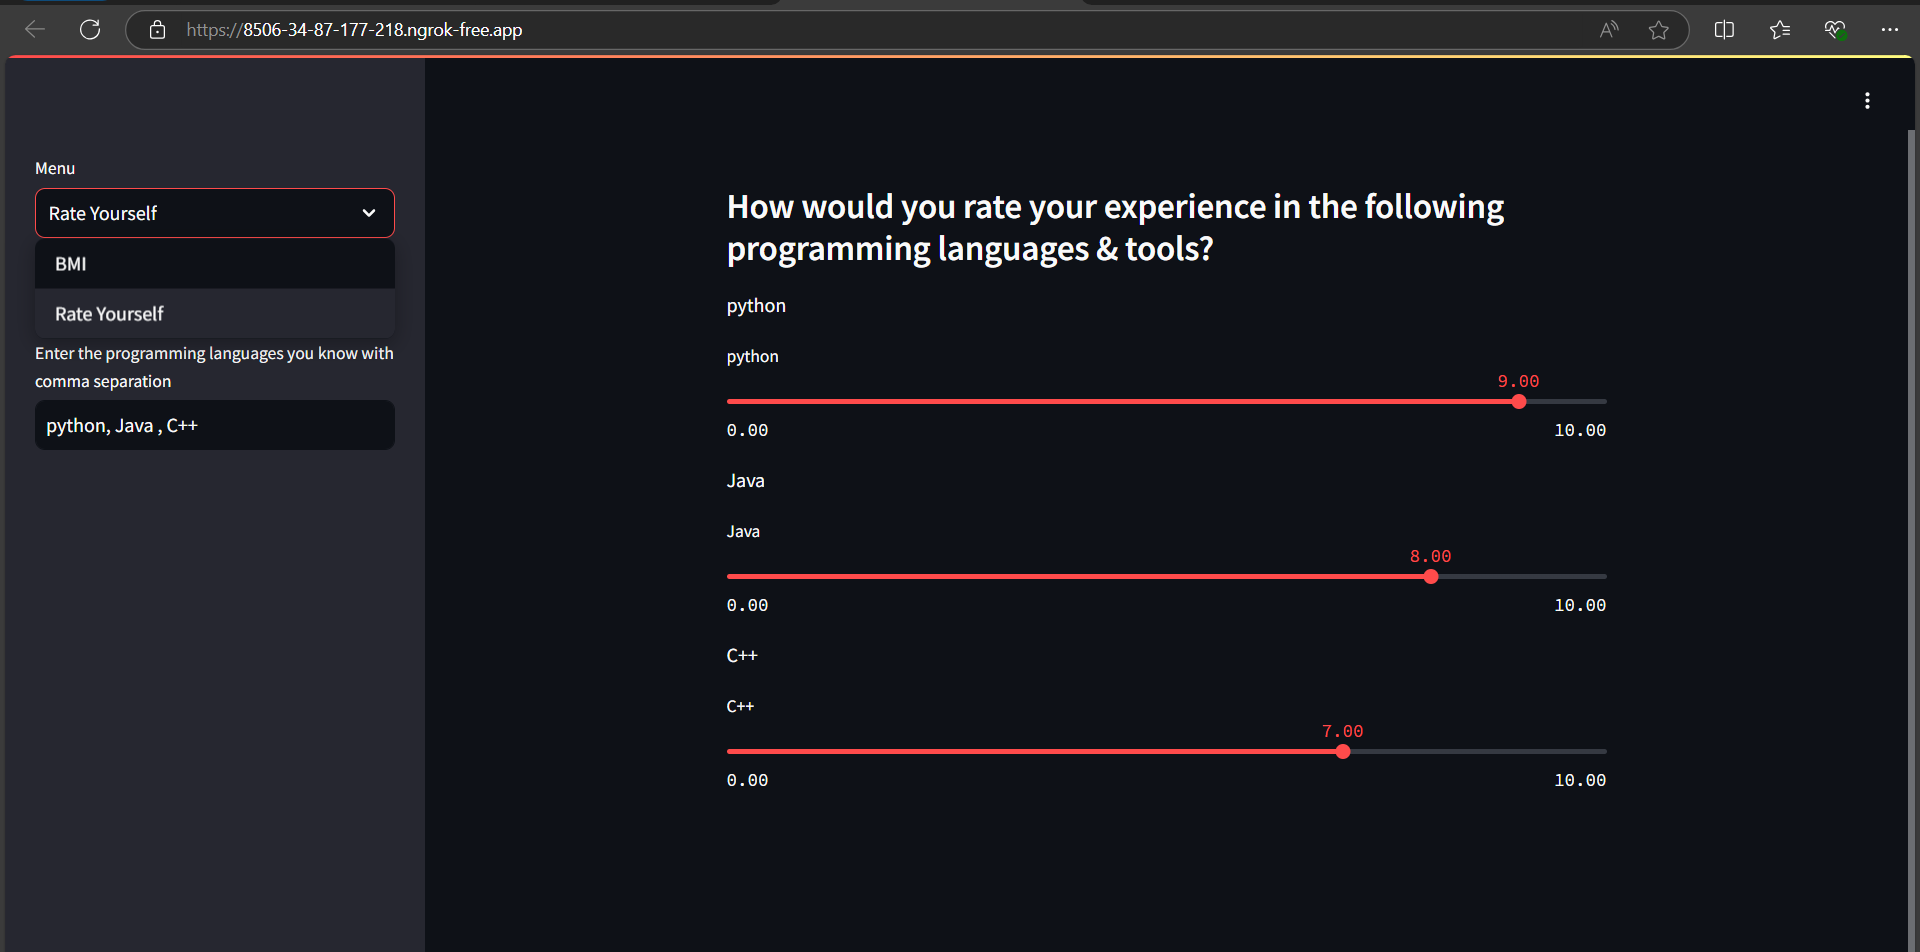

In [3]:
# To install streamlit in colab
!pip install streamlit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 103.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 18.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 109.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.9/82.9 kB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 5.7 MB/s eta 0:00:00
  Attempting uninstall: tenacity
    Found existing installation: tenacity 9.0.0
    Uninstalling tenacity-9.0.0:
      Successfully uninstalled tenacity-9.0.0


In [4]:
# Command to install ngrok
!pip install pyngrok

In [5]:
from pyngrok import ngrok

ngrok.set_auth_token("2m8pTgueAL7L2bjgMtIit9xdweM_78h6eEwZUbbLPN3XNuUz6")

In [15]:
# Write the Streamlit app code to a file-app.py
%%writefile app.py
import streamlit as st

#Code for application- bmi calculator
def bmi_calc():
    st.title("BMI Calculator:")

    with st.form(key='BMI Calculator', clear_on_submit=False):
        col1, col2, col3 = st.columns([3, 2, 1])

        with col1:
            weight = st.number_input("Enter your weight in KGS")

        with col2:
            height = st.number_input("Enter your height in mtrs")

        with col3:
            submit = st.form_submit_button(label='Calculate')

    if submit:
        BMI = round((weight / height**2), 2)
        if BMI <= 18.5:
            st.error("Underweight")
        elif 18.5 < BMI <= 24.9:
            st.success("Healthy/ Normal BMI")
        elif 25 <= BMI <= 29.9:
            st.warning("Overweight")
        elif BMI >= 30.0:
            st.error("OBESE")

#Code for application- rate yourself
def rate_yourself():
    with st.sidebar:
        st.title('Rate Yourself')
        languages = st.text_input('Enter the programming languages you know with comma separation', value='Python')
        languages = [i.strip() for i in languages.split(',')]

    st.subheader('How would you rate your experience in the following programming languages & tools?')

    for language in languages:
        st.write(language)
        st.slider(language, min_value=0., max_value=10., step=0.5)

ch = st.sidebar.selectbox("Menu", ['BMI', 'Rate Yourself'])

if ch == 'BMI':
    bmi_calc()
elif ch == 'Rate Yourself':
    rate_yourself()

Overwriting app.py


In [12]:
#This command is used to run a Streamlit application in the background and redirect its output to a log file.
!streamlit run app.py &>/content/logs.txt &

In [13]:
#This command is used to create a secure tunnel to your local web server running on port 8501 and expose it to the internet.
public_url = ngrok.connect(8501, proto = 'http')
print(public_url)

NgrokTunnel: "https://0a59-34-87-177-218.ngrok-free.app" -> "http://localhost:8501"
